# LOADING DATASETS 

### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt

#importing libraries to find stop words and for tokeniztion
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#importing sklearn libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [2]:
#importing the dataset directly from sklearn
#cause dataset given can only be uploaded in unix or linux
#but the dataset is same in both of the cases
newsgroup = fetch_20newsgroups()

# DATA PRE-PROCESSING

### First look at the Dataset

In [3]:
#basic look at what keys we have and the length of our data
print(newsgroup.keys())
print(len(newsgroup.data))

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])
11314


In [4]:
newsgroup.DESCR

'.. _20newsgroups_dataset:\n\nThe 20 newsgroups text dataset\n------------------------------\n\nThe 20 newsgroups dataset comprises around 18000 newsgroups posts on\n20 topics split in two subsets: one for training (or development)\nand the other one for testing (or for performance evaluation). The split\nbetween the train and test set is based upon a messages posted before\nand after a specific date.\n\nThis module contains two loaders. The first one,\n:func:`sklearn.datasets.fetch_20newsgroups`,\nreturns a list of the raw texts that can be fed to text feature\nextractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`\nwith custom parameters so as to extract feature vectors.\nThe second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,\nreturns ready-to-use features, i.e., it is not necessary to use a feature\nextractor.\n\n**Data Set Characteristics:**\n\n    =================   ==========\n    Classes                     20\n    Samples total           

### Train Test Split

In [5]:
X = newsgroup.data
Y = newsgroup.target
#modifying X in a way we have list of list of words(tokenized data for each document)
X_modified = [word_tokenize(doc) for doc in X]
#spliting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X_modified, Y, random_state = 1)

### Creating vocabulary without stopwords

adding all the stopwords in a single variable

In [6]:
#stopword and punctuation handling 
stops = set(stopwords.words('english'))#set of English stopwords using the NLTK library 
punctuations = list(string.punctuation)
stops.update(punctuations)#adding punctions in the stop variable only
#adding few more stop words downloaded from the internet(kaggle)
more_stops = np.loadtxt("/Users/halfdeb/Downloads/Text Classifier/stopwords.txt", dtype=str, delimiter=" ")
stops.update(more_stops)

#checking the complete size of the sizeword
print(len(stops))

824


Filtering and tokenizing the text data(in the form list)

In [7]:
#creating a vocabulary(list) which will contain all the words
all_words = []
for doc in x_train:
    for word in doc:
        #1. converting all the words into lower case if its not a stop, otherwise remove it
        #2. removing length 1 and 2 from my vocabulary because these words wont be helpful
        #3. filtering out certain types of words
        if(word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            all_words.append(word)
            
#checking the length of the vocabulary
len(all_words)

1263457

converting the list into a dictonary

In [8]:
#creating a fuction to convert the list in a dictonary
#keys -> particular words
#values -> frequency of those words
def freq_dic(all_words):
    dic = {}
    for word in all_words:
        #if we encounter same key again we will increase the frequency by 1
        if word in dic.keys():
            dic[word] += 1
        else:
            dic[word] = 1
    return dic

#converting all_words(list) into a dictonary
dic = freq_dic(all_words)

### Visualization of the Data

converting the keys and freq in seperate arrays(for plotting) & sorting them

In [9]:
#converting the keys and freq in seperate arrays(for plotting)
freq = np.array([i for i in dic.values()])
words = np.array([i for i in dic.keys()])

#sorting all the values
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]

plotting the graph

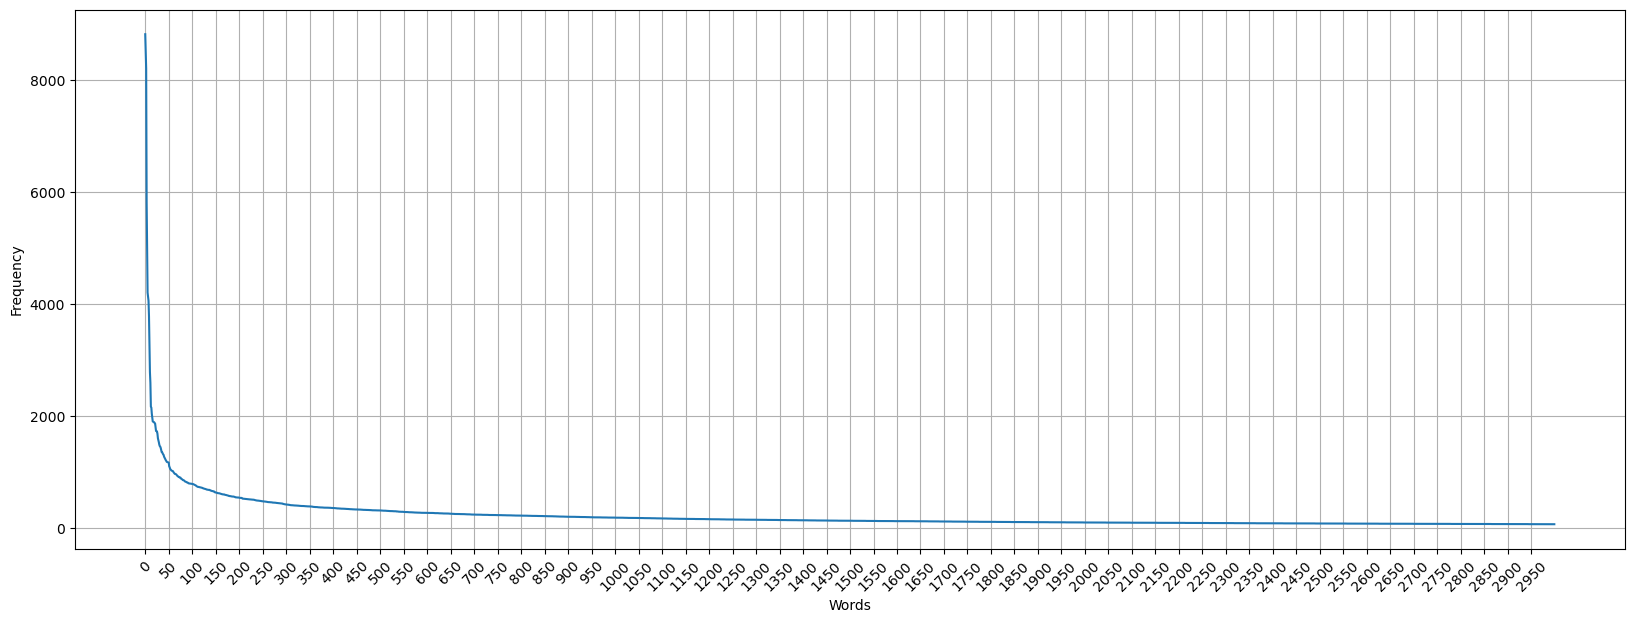

In [10]:
#setting the limits for our graph
lower_limit = 0
upper_limit = 3000
#adjusting size of the graph for more clearity
plt.figure(figsize = (20, 7))
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words')
plt.ylabel('Frequency')
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()

creating feature which only contains most frequently used words in all our documents

In [11]:
features = words[20:20000]
freq[20], freq[20000]

(1873, 7)

### Data Modifier function & MODIFICATION

creating modification function

In [12]:
#This fucntion will take the parameters(x_train or x_test) and convert it into 2-D array
#rows -> will be the documents
#coloumns -> will be the features
def data_modifier(x_data, features):
    #creating modified_data which will have ZEROS & whose shape is (len(x_data), len(features)) at start
    modified_data = np.zeros((len(x_data), len(features)))
    
    #creting dictionary
    for i in range(len(x_data)):
        current_doc=x_data[i]
        d=dict()
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
                    
        #now for each feature we are adding values to the corresponding feature 
        for j in range(len(features)):
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                #if the feature is not in the dictonary we will keep it as a zero
                continue
        
    return modified_data

modifying x_train and x_test

In [13]:
x_train_modified = data_modifier(x_train, features)
x_test_modified = data_modifier(x_test, features)

# MODEL

### USING IN-BUILT NAIVE BAYES

In [14]:
clf = MultinomialNB()
clf.fit(x_train_modified, y_train)
clf.score(x_test_modified, y_test)

0.8812301166489925

In [15]:
y_pred_test = clf.predict(x_test_modified)
#printing the classification report for our own naive bayes classifier
print(classification_report(y_true = y_test, y_pred = y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       114
           1       0.70      0.85      0.77       152
           2       0.91      0.72      0.80       139
           3       0.75      0.82      0.78       152
           4       0.83      0.91      0.87       138
           5       0.85      0.86      0.85       153
           6       0.80      0.78      0.79       147
           7       0.90      0.89      0.90       137
           8       0.91      0.96      0.94       131
           9       0.93      0.95      0.94       135
          10       0.99      0.96      0.97       136
          11       0.95      0.99      0.97       145
          12       0.90      0.78      0.83       157
          13       0.95      0.96      0.96       151
          14       0.95      0.94      0.94       155
          15       0.91      0.91      0.91       159
          16       0.88      0.97      0.93       140
          17       0.97    

In [16]:
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

[[101   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0   0
    1   8]
 [  0 129   4   7   3   5   2   0   0   0   0   1   1   0   0   0   0   0
    0   0]
 [  0  10 100  12   3  11   2   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   4   4 124   7   3   5   1   0   0   0   1   3   0   0   0   0   0
    0   0]
 [  0   1   0   4 125   0   4   1   0   1   0   0   0   1   0   0   0   0
    1   0]
 [  0  15   1   1   1 131   0   1   1   0   0   0   0   1   0   0   1   0
    0   0]
 [  1   2   0   7   3   0 114   3   4   2   0   2   6   0   1   0   0   0
    2   0]
 [  0   0   0   0   0   0   6 122   2   2   0   0   2   0   2   0   1   0
    0   0]
 [  0   0   0   0   0   0   3   1 126   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   2   0   2   0   0   0   0   0 128   1   0   0   1   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   2   0   1   2 130   0   0   0   0   0   1   0
    0   0]
 [  0   1   0   0   0   0   0   0   0   0   0 143   0   0   1   0

### SELF IMPLEMENTED NAIVE BAYES

creating all the function required for naive bayes classification

In [17]:
def fit(x_train, y_train):
    dic = {}
    for i in range(20):
        #these are all the documents we need to work upon corresponding to the class i
        needed_docs = x_train[y_train == i]
        #count is a dictionary whose each key is yet another dictionary
        dic[i] = {}
        #it will maintain the total number of words in class i
        dic[i]['total'] = 0
        for j in range(len(features)):
            #it gives how many times jth feature is coming corresponding to class i
            dic[i][features[j]] = needed_docs[:, j].sum()
            #this stores the sum of all the values of ith key
            dic[i]['total'] += dic[i][features[j]]

    #returning the dictionary
    return dic

def probability(dictionary, x, current_class):
    probas_for_each_word = []
    #iterating through each feature
    for i in range(len(x)):
        if x[i] != 0:
            #it denotes that how many times that ith feature is occuring in current_class
            numerator = dictionary[current_class][features[i]]
            #it denotes that what is the total number of words in the current class          
            denominator = dictionary[current_class]['total']
            
            #log probability with laplace correction
            proba = np.log((numerator+1)/(denominator+len(x)))
            #appending the value
            probas_for_each_word.append(proba)
            
    #returning the logarithmic sum of all the probabilities
    return sum(probas_for_each_word)

def predict_single(dic, x):
    #this variable "classes" maintains all the possible different classes available to us
    classes = dictionary.keys()
    best_p = -1000
    best_class = -1
    first_run = True
    
    #iterating through each and every class in all possible classes
    for current_class in classes:
        #p_current_class is the probability of current class
        p_current_class = probability(dic, x, current_class)
        if (first_run or p_current_class > best_p):
            best_p = p_current_class
            best_class = current_class
        first_run = False
        
    #returning the best predicted class for the current data point
    return best_class

def predict(x_test, dic):
    y_pred = []
    #iterating each document in testing data
    for doc in x_test:
        y_pred.append(predict_single(dic, doc))
    return y_pred

Predicting with the self implemented Naive Bayes

In [18]:
dictionary = fit(x_train_modified, y_train)
y_predicted = predict(x_test_modified, dictionary)

In [19]:
#printing the classification report for our own naive bayes classifier
print(classification_report(y_true = y_test, y_pred = y_predicted))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       114
           1       0.68      0.83      0.75       152
           2       0.98      0.62      0.76       139
           3       0.65      0.82      0.73       152
           4       0.79      0.90      0.84       138
           5       0.82      0.88      0.85       153
           6       0.84      0.67      0.74       147
           7       0.87      0.89      0.88       137
           8       0.94      0.94      0.94       131
           9       0.93      0.95      0.94       135
          10       0.98      0.96      0.97       136
          11       0.94      0.99      0.96       145
          12       0.90      0.76      0.82       157
          13       0.97      0.95      0.96       151
          14       0.95      0.90      0.93       155
          15       0.84      0.95      0.89       159
          16       0.88      0.95      0.91       140
          17       0.96    

In [20]:
#printing the confusion matrix for our own naive bayes classifier
for i in confusion_matrix(y_true=y_test, y_pred=y_predicted):
    for j in i:
        print(j, end="    ")
    print()

103    0    0    0    0    0    0    0    0    0    0    0    0    0    0    5    0    1    0    5    
0    126    1    9    4    9    1    0    0    0    0    1    0    0    0    1    0    0    0    0    
0    11    86    23    5    12    1    0    0    0    0    1    0    0    0    0    0    0    0    0    
1    6    1    125    9    2    4    1    0    0    0    0    2    0    0    1    0    0    0    0    
0    1    0    5    124    1    4    1    0    0    0    0    0    1    0    0    0    0    1    0    
0    12    0    2    1    135    0    1    1    0    0    0    0    1    0    0    0    0    0    0    
1    7    0    9    5    1    98    3    2    3    1    3    8    1    2    0    0    0    3    0    
0    1    0    1    0    0    5    122    2    1    0    0    2    0    1    0    0    0    2    0    
0    0    0    0    0    0    3    3    123    0    0    0    0    0    0    0    2    0    0    0    
0    1    0    2    0    0    0    1    0    128    1    0    0    0   

# OBSERVATIONS

**COMPARISION**

- The comparison between in-built and self-implemented Naive Bayes when the number of features selected is 20,000
- Both in-built and self-implemented Naive Bayes are performing nearly the same.
- One is performing really well in a few classes while the other is doing well in some other classes.
- For in-built Naive Bayes, the accuracy is 88%.
- For self-implemented Naive Bayes, the accuracy is 87%.

**OTHER OBSERVATIONS**

- Recall of some classes is excellent, while recall of others is moderate (because of feature selection).
- More accurately the feature is selected, more will be precision, recall, and f1-score.
- From the confusion matrix, we can determine that our algorithm is performing not that badly (for both the in-built and self-implemented models).
- The accuracy can be increased up to 90% by increasing the number of features to 50000, but at 49999, the frequency is just 2 (so, not recommended).